In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("preprocessed_dataset.csv")
df = df.set_index('date')

df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
# !pip install -q torch torchvision --index-url https://download.pytorch.org/whl/cu118
!pip install -q transformers
!pip install -q datasets
!pip install -q evaluate
!pip install -q accelerate
!pip install -q gluonts ujson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 7.9 MB/s eta 0:00:00


Metrics with different hyperparameter values

In [ ]:
import itertools
combinations = list(itertools.product([12,2*12,4*12],[64,2*64,3*64],[0.0005,0.001,0.005]))

from rnn_test import RnnModel
import numpy as np
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

seq_len_list, n_units_list, lr_list, mase_list, smape_list = [],[],[],[],[]

print('RNN')
for combination in combinations:
    base_model = RnnModel(df, unit_type="base", seq_len=combination[0], split_ratio=0.85, n_units=combination[1], lr=combination[2], mode='valid')
    base_model.train(epochs=100, batch_size=combination[0])

    mase_training = np.array(base_model.X_train).reshape(-1, 4)*base_model.stats[1,1] + base_model.stats[0,1]
    mase_training = mase_training[:, 1]
    base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
    base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

    seq_len_list.append(combination[0])
    n_units_list.append(combination[1])
    lr_list.append(combination[2])
    mase_list.append(base_mase_results)
    smape_list.append(base_smape_metric)
    print(f'seq_len: {combination[0]}')
    print(f'n_units: {combination[1]}')
    print(f'learning rate: {combination[2]}')
    print(f'MASE: {base_mase_results}')
    print(f'SMAPE: {base_smape_metric}')

dict = {'seq_len': seq_len_list, 'n_units': n_units_list, 'learning rate': lr_list, 'MASE': mase_list, 'SMAPE': smape_list}
df_results = pd.DataFrame(dict)

df_results.to_csv('hyperparameter_results_RNN.csv')

In [ ]:
import itertools
combinations = list(itertools.product([12,2*12,4*12],[64,2*64,3*64],[0.0005,0.001,0.005]))

from rnn_test import RnnModel
import numpy as np
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

seq_len_list, n_units_list, lr_list, mase_list, smape_list = [],[],[],[],[]

print('LSTM')
for combination in combinations:
    base_model = RnnModel(df, unit_type="lstm", seq_len=combination[0], split_ratio=0.85, n_units=combination[1], lr=combination[2], mode='valid')
    base_model.train(epochs=100, batch_size=combination[0])

    mase_training = np.array(base_model.X_train).reshape(-1, 4)*base_model.stats[1,1] + base_model.stats[0,1]
    mase_training = mase_training[:, 1]
    base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
    base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

    seq_len_list.append(combination[0])
    n_units_list.append(combination[1])
    lr_list.append(combination[2])
    mase_list.append(base_mase_results)
    smape_list.append(base_smape_metric)
    print(f'seq_len: {combination[0]}')
    print(f'n_units: {combination[1]}')
    print(f'learning rate: {combination[2]}')
    print(f'MASE: {base_mase_results}')
    print(f'SMAPE: {base_smape_metric}')

dict = {'seq_len': seq_len_list, 'n_units': n_units_list, 'learning rate': lr_list, 'MASE': mase_list, 'SMAPE': smape_list}
df_results = pd.DataFrame(dict)

df_results.to_csv('hyperparameter_results_LSTM.csv')

Testing with test partition

[12, 128, 0.001]
Epoch 1/100
121/121 [==============================] - 2s 9ms/step - loss: 0.2745
Epoch 2/100
121/121 [==============================] - 1s 8ms/step - loss: 0.2194
Epoch 3/100
121/121 [==============================] - 1s 9ms/step - loss: 0.2185
Epoch 4/100
121/121 [==============================] - 1s 9ms/step - loss: 0.2039
Epoch 5/100
121/121 [==============================] - 1s 9ms/step - loss: 0.2002
Epoch 6/100
121/121 [==============================] - 1s 9ms/step - loss: 0.1974
Epoch 7/100
121/121 [==============================] - 1s 8ms/step - loss: 0.1925
Epoch 8/100
121/121 [==============================] - 2s 14ms/step - loss: 0.1909
Epoch 9/100
121/121 [==============================] - 2s 12ms/step - loss: 0.1804
Epoch 10/100
121/121 [==============================] - 1s 8ms/step - loss: 0.1772
Epoch 11/100
121/121 [==============================] - 1s 9ms/step - loss: 0.1659
Epoch 12/100
121/121 [==============================] - 1s 8ms/step - loss: 0

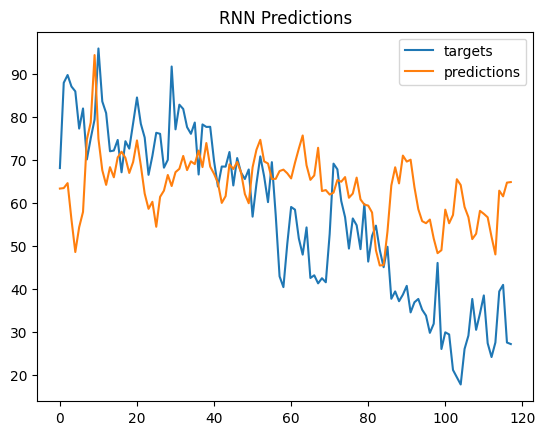

In [6]:
import numpy as np

df_results = pd.read_csv('hyperparameter_results_RNN.csv')
mase_list = df_results['MASE'].tolist()
mase_list = np.array([float(value.split(' ')[len(value.split(' ')) -1 ].split('}')[0]) for value in mase_list])

opt = [df_results.loc[np.argmin(mase_list),'seq_len'], df_results.loc[np.argmin(mase_list),'n_units'], df_results.loc[np.argmin(mase_list),'learning rate']]
print(opt)

from rnn_test import RnnModel
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_model = RnnModel(df, unit_type="base", seq_len=opt[0], split_ratio=0.85, n_units=opt[1], lr=opt[2], mode='test')
base_model.train(epochs=100, batch_size=opt[0])

mase_training = np.array(base_model.X_train).reshape(-1, 4)*base_model.stats[1,1] + base_model.stats[0,1]
mase_training = mase_training[:, 1]
base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

base_model.plot_validation_pred_target()

[24, 128, 0.005]
Epoch 1/100
60/60 [==============================] - 3s 4ms/step - loss: 0.3199
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2265
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2077
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2011
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1968
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1976
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1997
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1931
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1962
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1895
Epoch 11/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1894
Epoch 12/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1858
Epoch 13/100
60/60 [

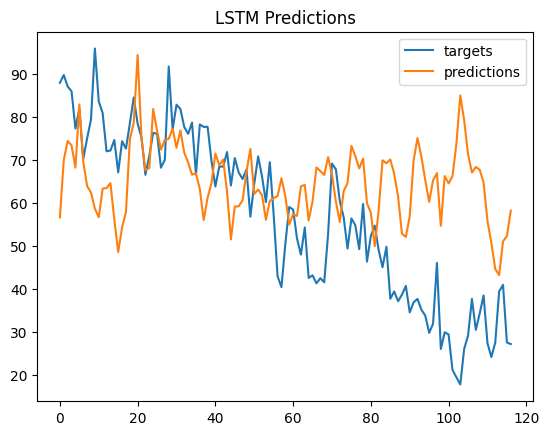

In [7]:
import numpy as np

df_results = pd.read_csv('hyperparameter_results_LSTM.csv')
mase_list = df_results['MASE'].tolist()
mase_list = np.array([float(value.split(' ')[len(value.split(' ')) -1 ].split('}')[0]) for value in mase_list])

opt = [df_results.loc[np.argmin(mase_list),'seq_len'], df_results.loc[np.argmin(mase_list),'n_units'], df_results.loc[np.argmin(mase_list),'learning rate']]
print(opt)

from rnn_test import RnnModel
from evaluate import load

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

base_model = RnnModel(df, unit_type="lstm", seq_len=opt[0], split_ratio=0.85, n_units=opt[1], lr=opt[2], mode='test')
base_model.train(epochs=100, batch_size=opt[0])

mase_training = np.array(base_model.X_train).reshape(-1, 4)*base_model.stats[1,1] + base_model.stats[0,1]
mase_training = mase_training[:, 1]
base_mase_results = mase_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions, training=mase_training)
base_smape_metric = smape_metric.compute(references=base_model.validation_target, predictions=base_model.validation_predictions)

print(f'MASE: {base_mase_results}')
print(f'SMAPE: {base_smape_metric}')

base_model.plot_validation_pred_target()